# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [5]:
#Loading the data
data = pd.read_csv("Cancer (1).csv")

In [6]:
#Displaying top 10 Rows
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [7]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [8]:
print("The shape of dataset is ",(data.shape))

The shape of dataset is  (699, 11)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [41]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
data.isna().sum()
#This  shows there is no missing value 

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [42]:
#By seeing bare nuclei column all integer value but it is showing object type
#Checking for the bare nuclei column contain anything other than digit 
temp = pd.DataFrame(data["Bare Nuclei"].str.isdigit())
temp[temp["Bare Nuclei"]==False]
#Temp shows that it contain some values which is not digit 
#There are 16 instances where there are some other value except digit
#This could be potential missing value 

,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [53]:
#Checking what are the unique values for bare nuclei column
data["Bare Nuclei"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [55]:
data[data["Bare Nuclei"] == '?'].count()
#There are 16 instances where there are ? in bare nuclei

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [57]:
#Checking which values appears most of the time in bare nuclei
data["Bare Nuclei"].value_counts()
#Turns out 1 occurs 402 times 
#replacing ? with 1 as it appears most 

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [60]:
#Replacing ? with 1 
data["Bare Nuclei"].replace("?",'1', inplace=True)
#Checking for ? again in dataset 
data[data["Bare Nuclei"] == '?'].count()
#Now 0 shows that all the ? is replaced with 1

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [67]:
#Checking for duplicated values 
dup = data.duplicated()
print("The number of duplicate entries in data set are {}".format(dup.sum()))
#Displaying the entries that are duplicated
data[dup]

The number of duplicate entries in data set are 9


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [71]:
#Removing the duplicate entries
print("Shape of dataset before discarding the duplicates are {}".format(data.shape))
data.drop_duplicates(subset=None , inplace=True,keep='first')
print("Shape of dataset after discarding the duplicates are {}".format(data.shape))
#9 rows is droped 

Shape of dataset before discarding the duplicates are (690, 11)
Shape of dataset after discarding the duplicates are (690, 11)


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [73]:
# Check for correlation of variables
data.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.620526,0.633880,0.482517,0.681063
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.343769,0.427490,1.000000,0.423947
Class,-0.080084,0.716812,0.817586,0.817551,0.701175,0.681063,0.756736,0.715363,0.423947,1.000000


In [74]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

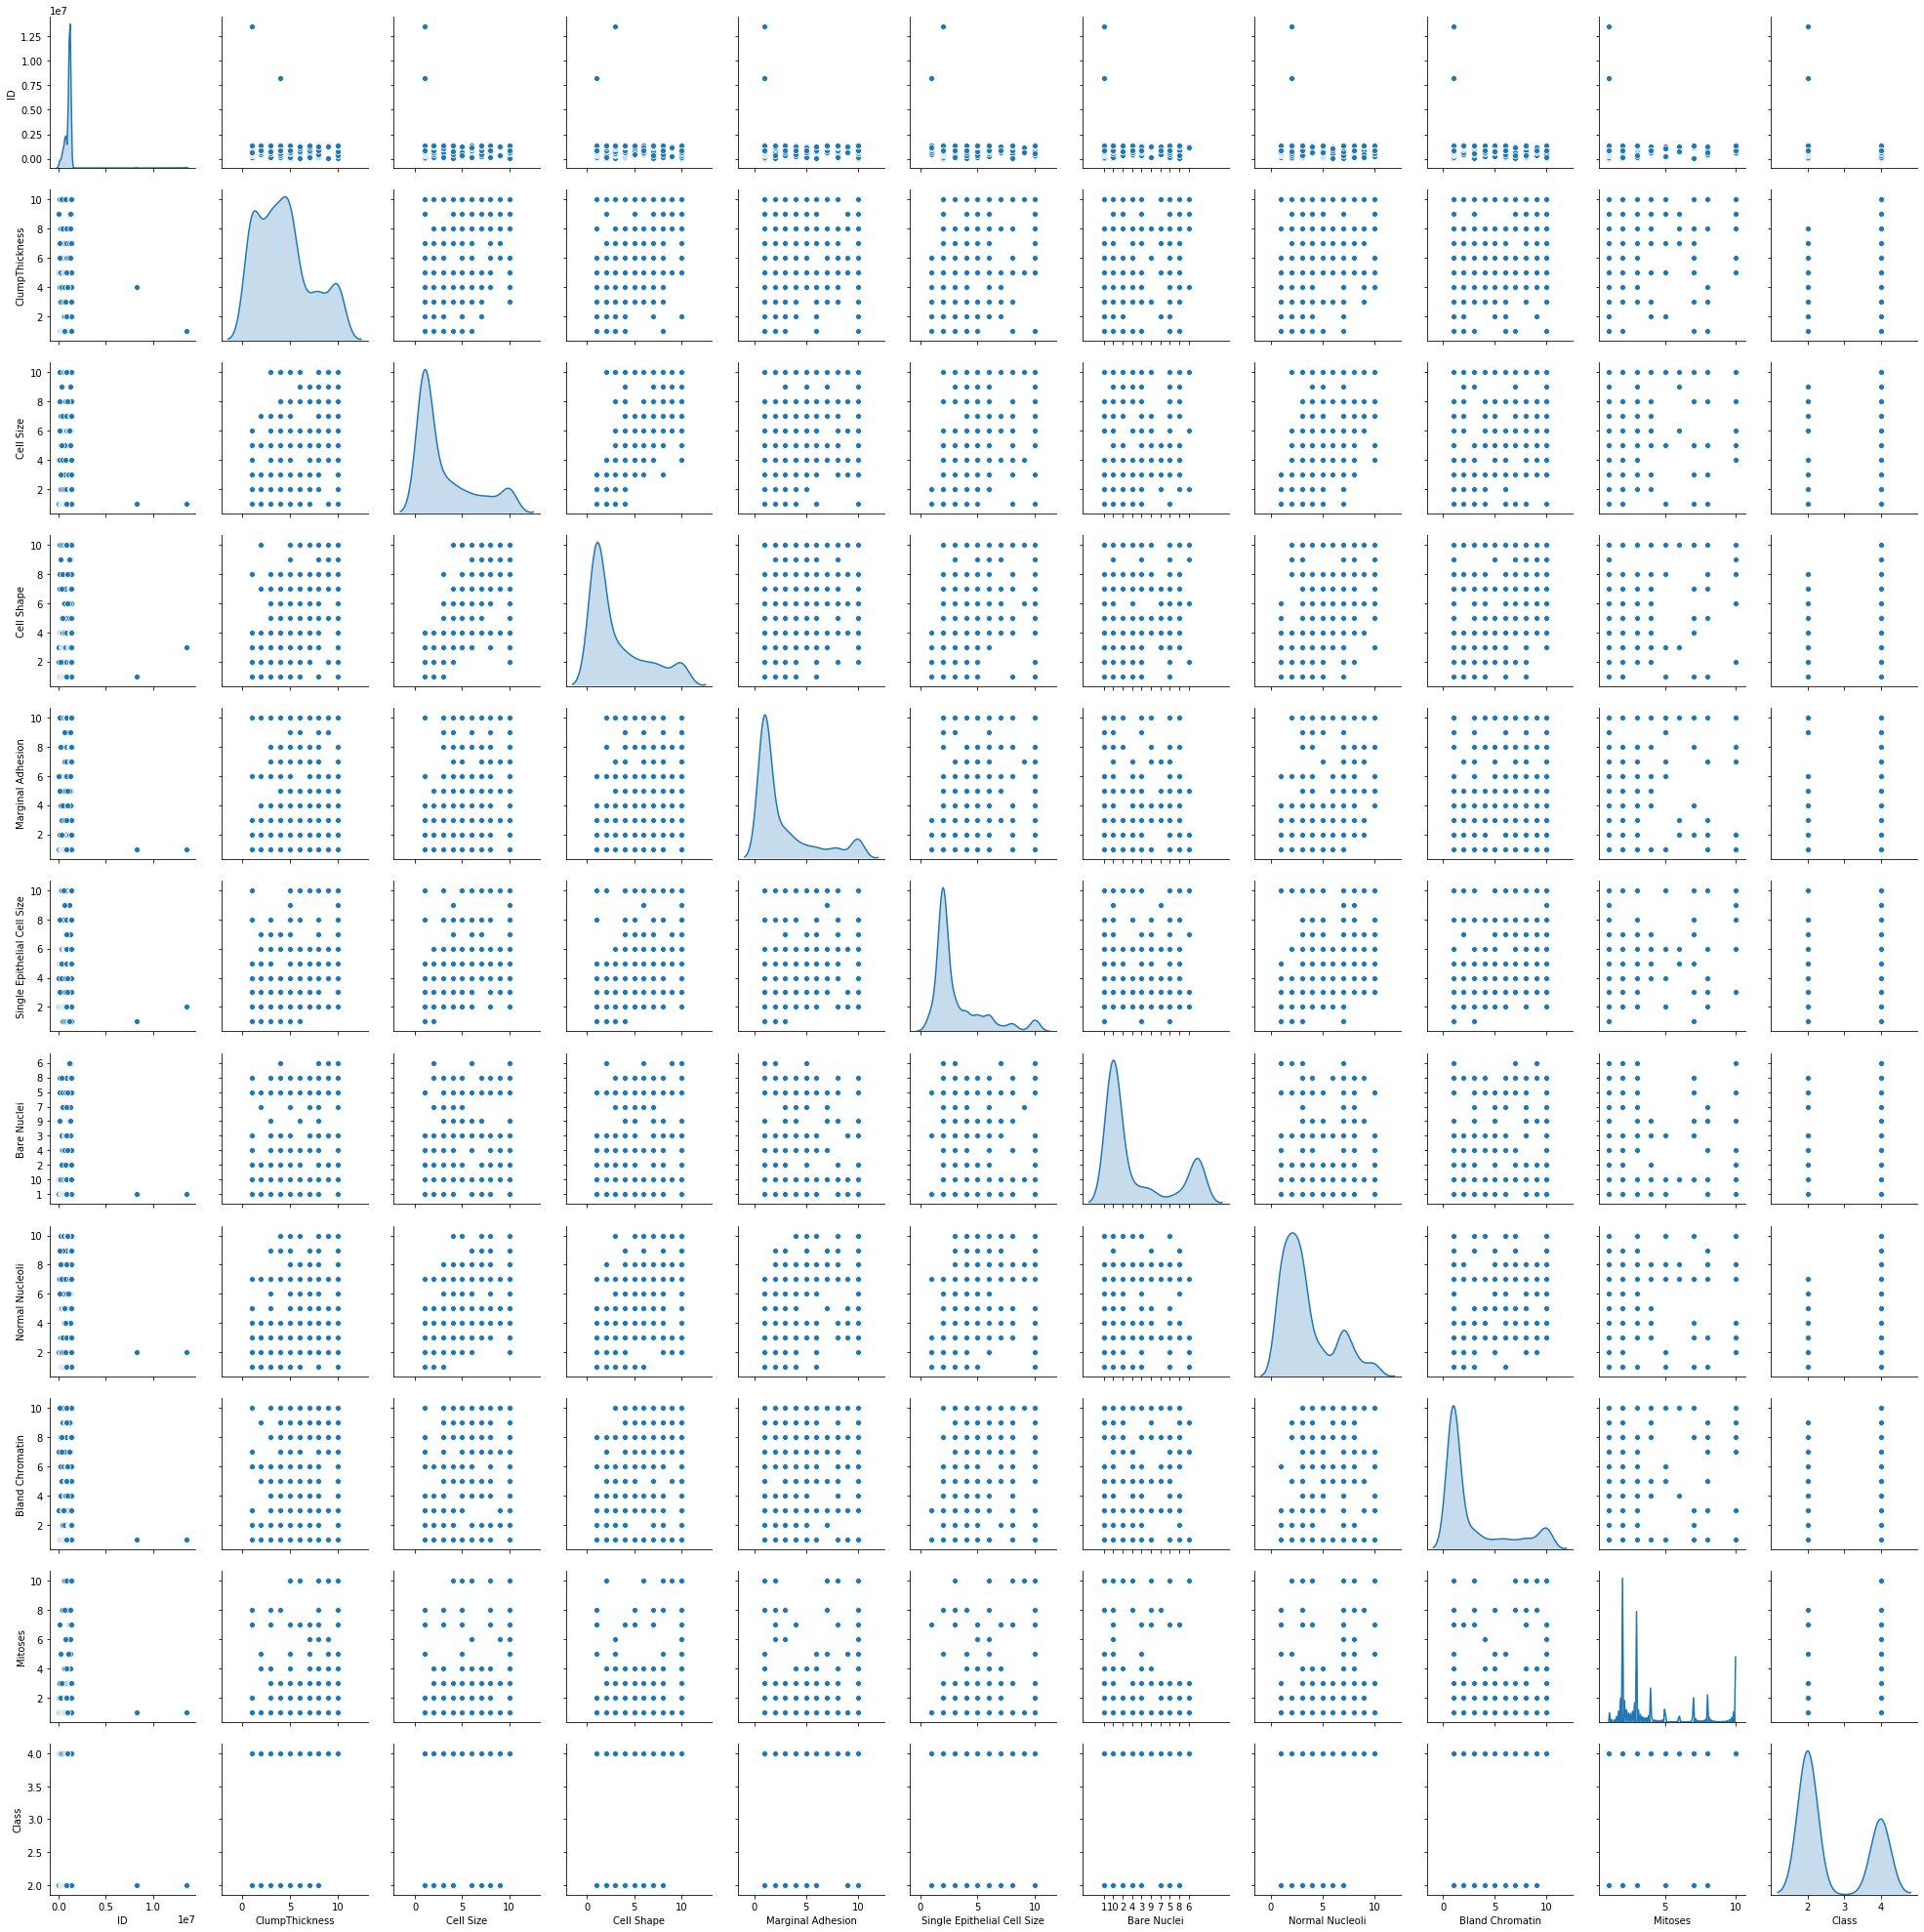

In [77]:
#Let us check the pair plot
sns.pairplot(data=data, diag_kind='kde')

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [78]:
# We could see most of the outliers are now removed.
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
data_new = pd.DataFrame(pt.fit_transform(data))
data_new.columns = data.columns
data_new.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.040540,0.395760,-0.863248,-0.926571,-0.814731,-0.483726,-0.792182,0.167861,-0.741707,-0.456094,-0.725637
1,-0.033537,0.395760,0.957743,0.865515,1.307841,1.580034,1.477453,0.167861,0.487357,-0.456094,-0.725637
2,-0.003750,-0.345716,-0.863248,-0.926571,-0.814731,-0.483726,0.223825,0.167861,-0.741707,-0.456094,-0.725637
3,-0.001725,0.695094,1.440865,1.418254,-0.814731,0.355548,0.956909,0.167861,1.511679,-0.456094,-0.725637
4,0.000048,0.054321,-0.863248,-0.926571,0.878370,-0.483726,-0.792182,0.167861,-0.741707,-0.456094,-0.725637


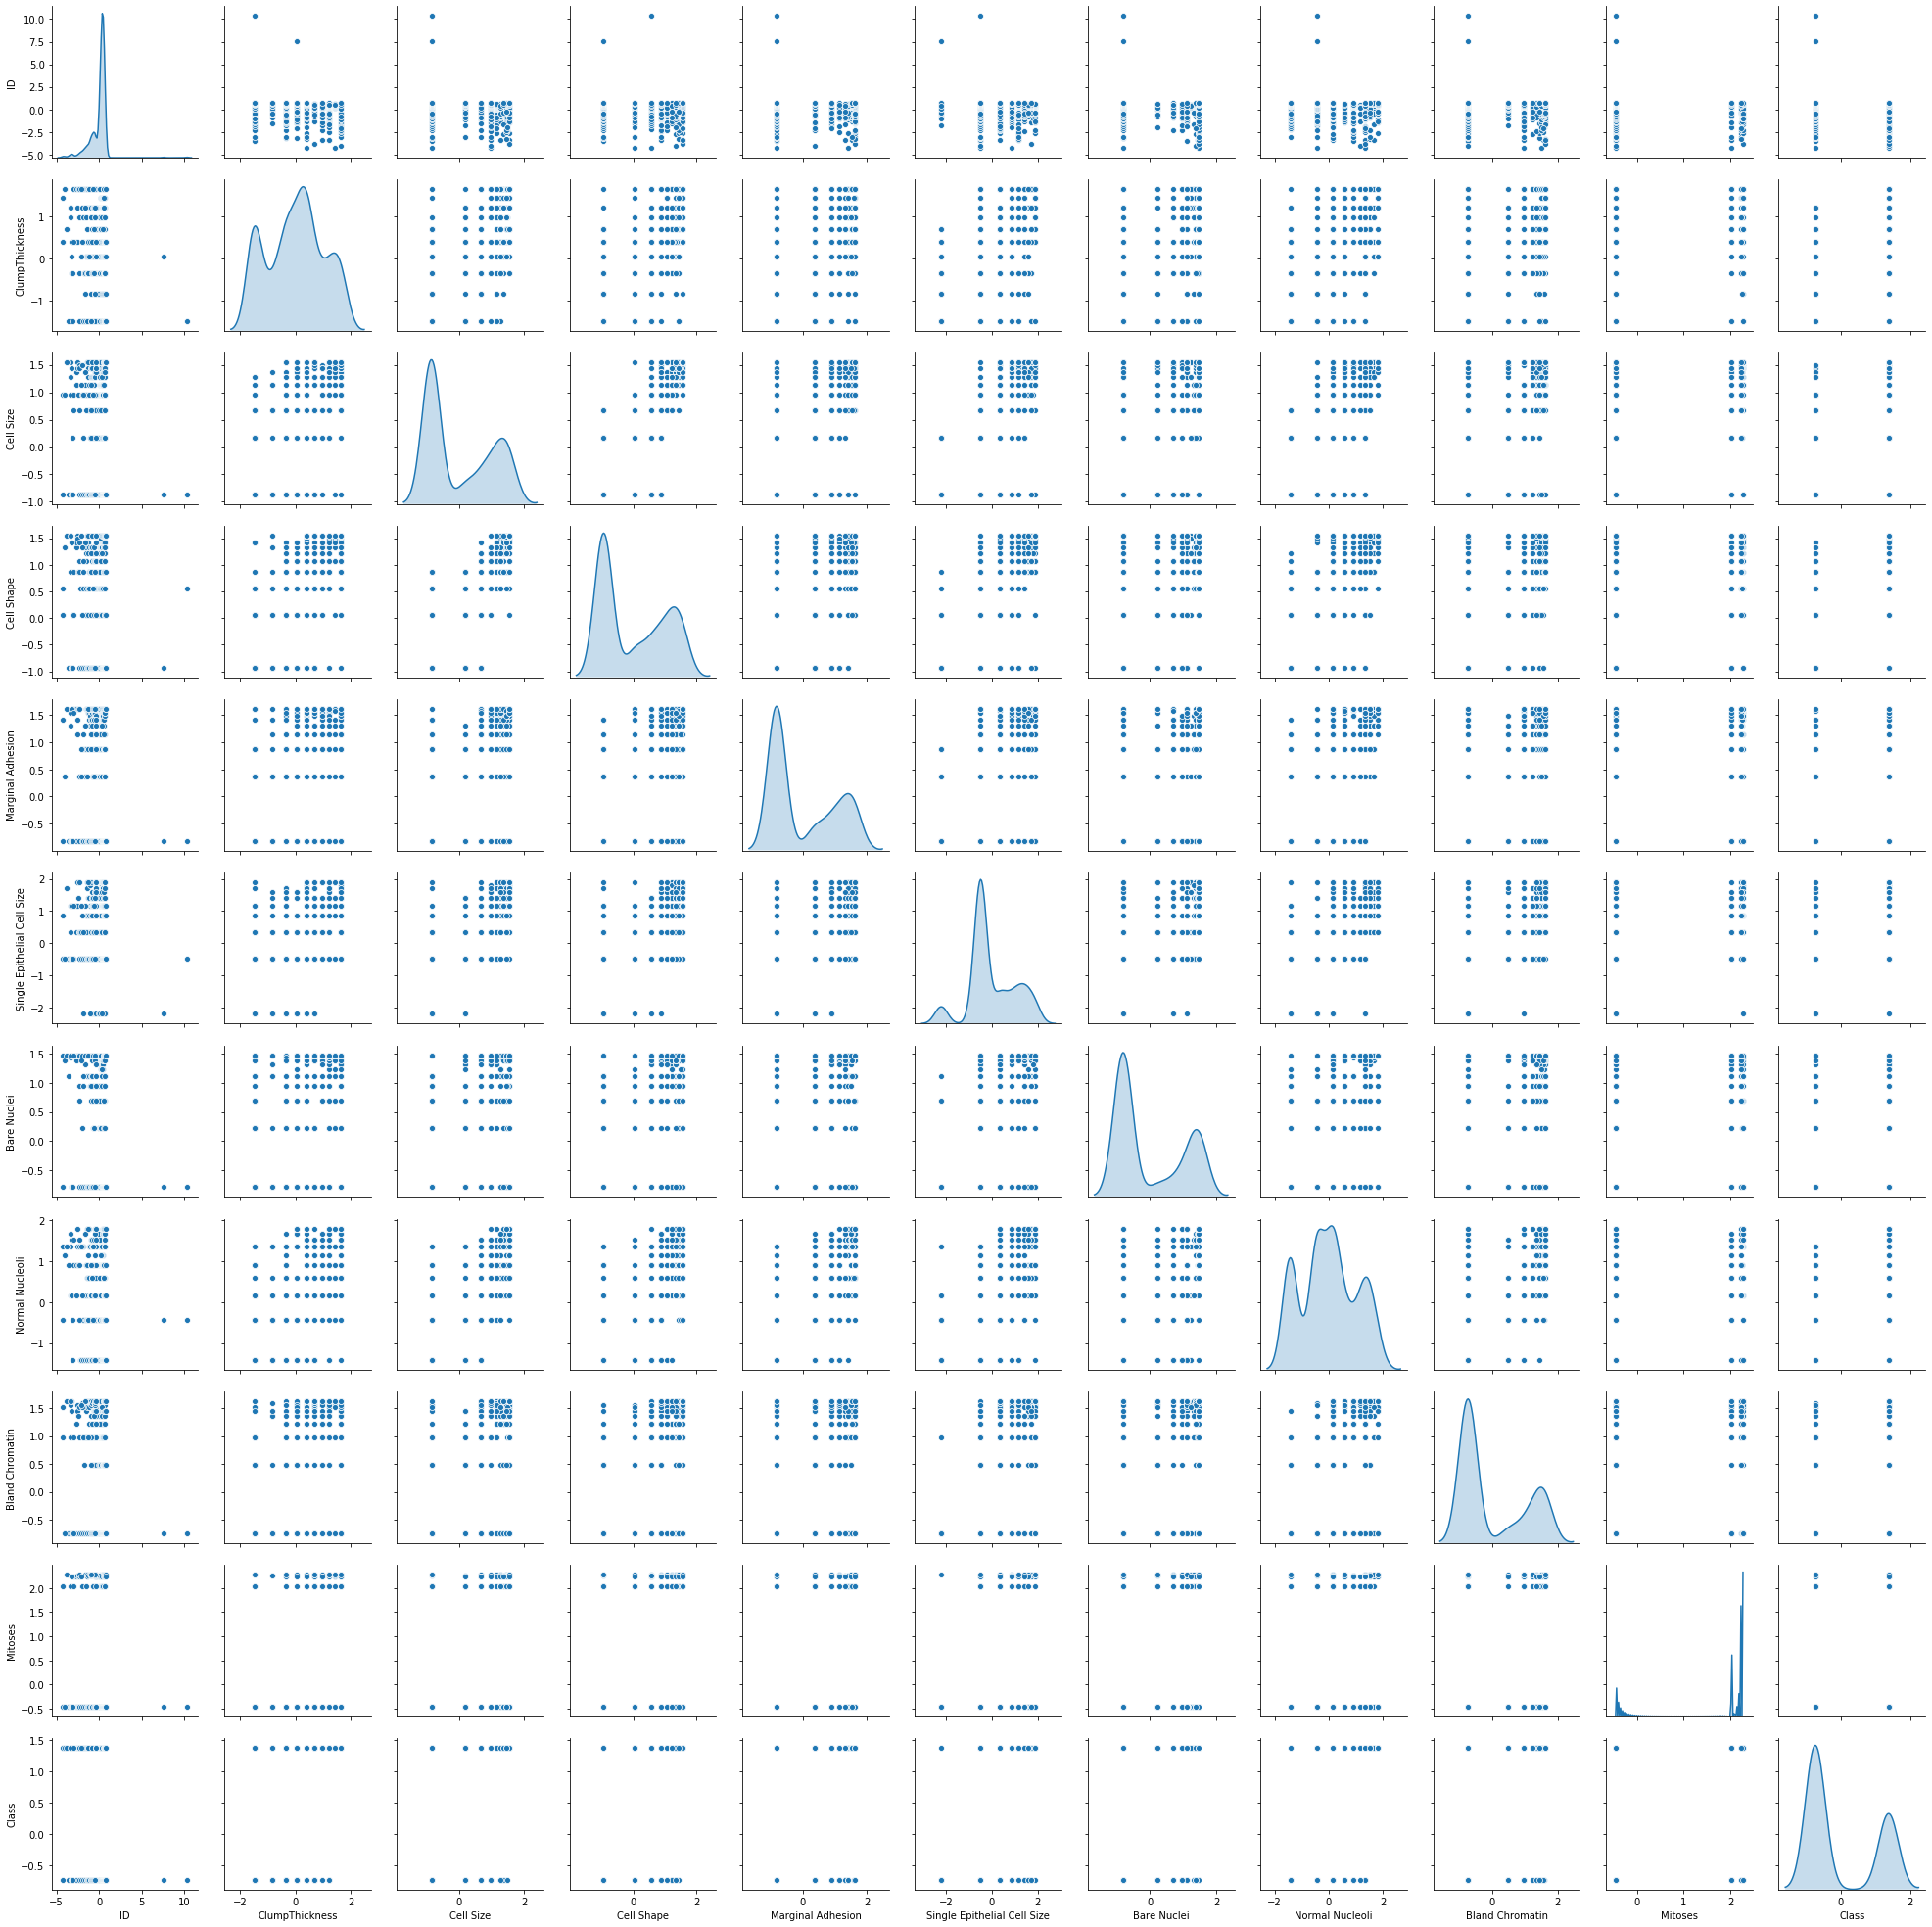

In [79]:
#Checking for pairplot after applying Power Transformer
sns.pairplot(data=data_new,diag_kind='kde')

In [80]:
#By using this Power Transformer distribution becomes more normal
#Most of the outliers are removed 

In [82]:
#Dropping the ID and Class column
data_new = data_new.drop(['ID','Class'],axis=1)

In [85]:
#Standardising the data
from scipy.stats import zscore
data_new=data_new.apply(zscore)
data_new.head()


,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.395760,-0.863248,-0.926571,-0.814731,-0.483726,-0.792182,0.167861,-0.741707,-0.456094
1,0.395760,0.957743,0.865515,1.307841,1.580034,1.477453,0.167861,0.487357,-0.456094
2,-0.345716,-0.863248,-0.926571,-0.814731,-0.483726,0.223825,0.167861,-0.741707,-0.456094
3,0.695094,1.440865,1.418254,-0.814731,0.355548,0.956909,0.167861,1.511679,-0.456094
4,0.054321,-0.863248,-0.926571,0.878370,-0.483726,-0.792182,0.167861,-0.741707,-0.456094


# Q6 Create a covariance matrix for identifying Principal components

In [87]:
# PCA
# Step 1 - Create covariance matrix
train_cov_matrix = np.cov(data_new.T)
print("The covariance matrix are ",train_cov_matrix)

The covariance matrix are  [[1.00145138 0.66227128 0.6548162  0.53857961 0.54743445 0.57852381
  0.52972744 0.559967   0.41295745]
 [0.66227128 1.00145138 0.89302439 0.75034656 0.74587373 0.77407166
  0.71924874 0.76685974 0.50569536]
 [0.6548162  0.89302439 1.00145138 0.71551863 0.72079784 0.75066633
  0.69071402 0.73309001 0.46415564]
 [0.53857961 0.75034656 0.71551863 1.00145138 0.63413592 0.69553224
  0.62267539 0.6409984  0.43365058]
 [0.54743445 0.74587373 0.72079784 0.63413592 1.00145138 0.64813615
  0.60194312 0.6716708  0.4532528 ]
 [0.57852381 0.77407166 0.75066633 0.69553224 0.64813615 1.00145138
  0.6566429  0.66879255 0.47797173]
 [0.52972744 0.71924874 0.69071402 0.62267539 0.60194312 0.6566429
  1.00145138 0.66122597 0.38169613]
 [0.559967   0.76685974 0.73309001 0.6409984  0.6716708  0.66879255
  0.66122597 1.00145138 0.49988801]
 [0.41295745 0.50569536 0.46415564 0.43365058 0.4532528  0.47797173
  0.38169613 0.49988801 1.00145138]]


the eigen vectors are 
 [[ 0.30115748 -0.00147183 -0.00504074  0.92152641 -0.18717359  0.13182146
   0.04393679 -0.07510287 -0.00916204]
 [ 0.37956804 -0.09235276  0.78945523 -0.00365809  0.44019543 -0.10250605
  -0.11512685  0.08125544  0.00315817]
 [ 0.36923084 -0.1374793  -0.60581471  0.04831071  0.63874379 -0.1884123
  -0.13946651  0.11090086  0.01341275]
 [ 0.33484923 -0.12333348 -0.05866042 -0.20475401 -0.11682941  0.59583244
  -0.01760057  0.24058601 -0.63280549]
 [ 0.33398832 -0.04136037 -0.0315697  -0.13072409 -0.21164889  0.04499423
   0.48680744  0.56680343  0.51340854]
 [ 0.3470496  -0.05486816 -0.02380216 -0.10192347 -0.42537413 -0.73100507
   0.03301762 -0.01283075 -0.38603726]
 [ 0.32539556 -0.24706127 -0.03282159 -0.20757956  0.00930322  0.15688559
   0.41989802 -0.75420084  0.13812691]
 [ 0.34385039  0.02414581 -0.05310659 -0.17179879 -0.33792979  0.13849702
  -0.73261499 -0.11889582  0.40572139]
 [ 0.24631255  0.94393517 -0.02866636 -0.08022649  0.09762061  0.03758617

# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [94]:
eigenvalues,eigenvectors = np.linalg.eig(train_cov_matrix)
print("the eigen vectors are \n",eigenvectors)
print("the eigen values are \n" , eigenvalues)

the eigen vectors are 
 [[ 0.30115748 -0.00147183 -0.00504074  0.92152641 -0.18717359  0.13182146
   0.04393679 -0.07510287 -0.00916204]
 [ 0.37956804 -0.09235276  0.78945523 -0.00365809  0.44019543 -0.10250605
  -0.11512685  0.08125544  0.00315817]
 [ 0.36923084 -0.1374793  -0.60581471  0.04831071  0.63874379 -0.1884123
  -0.13946651  0.11090086  0.01341275]
 [ 0.33484923 -0.12333348 -0.05866042 -0.20475401 -0.11682941  0.59583244
  -0.01760057  0.24058601 -0.63280549]
 [ 0.33398832 -0.04136037 -0.0315697  -0.13072409 -0.21164889  0.04499423
   0.48680744  0.56680343  0.51340854]
 [ 0.3470496  -0.05486816 -0.02380216 -0.10192347 -0.42537413 -0.73100507
   0.03301762 -0.01283075 -0.38603726]
 [ 0.32539556 -0.24706127 -0.03282159 -0.20757956  0.00930322  0.15688559
   0.41989802 -0.75420084  0.13812691]
 [ 0.34385039  0.02414581 -0.05310659 -0.17179879 -0.33792979  0.13849702
  -0.73261499 -0.11889582  0.40572139]
 [ 0.24631255  0.94393517 -0.02866636 -0.08022649  0.09762061  0.03758617

# Q8 Find variance and cumulative variance by each eigen vector

In [97]:
#Making Set of eigen values and eigen vectors
train_eig_pairs = [(eigenvalues[index],eigenvectors[index,:]) for index in range(len(eigenvalues))]
#Sorting the pair from highest to lowest
train_eig_pairs.sort(reverse=True)
train_eig_pairs

[(6.061076358442386,
  array([ 0.30115748, -0.00147183, -0.00504074,  0.92152641, -0.18717359,
          0.13182146,  0.04393679, -0.07510287, -0.00916204])),
 (0.6923095369255422,
  array([ 0.37956804, -0.09235276,  0.78945523, -0.00365809,  0.44019543,
         -0.10250605, -0.11512685,  0.08125544,  0.00315817])),
 (0.5121710520561031,
  array([ 0.33484923, -0.12333348, -0.05866042, -0.20475401, -0.11682941,
          0.59583244, -0.01760057,  0.24058601, -0.63280549])),
 (0.39767339539498026,
  array([ 0.34385039,  0.02414581, -0.05310659, -0.17179879, -0.33792979,
          0.13849702, -0.73261499, -0.11889582,  0.40572139])),
 (0.3906816414479454,
  array([ 0.24631255,  0.94393517, -0.02866636, -0.08022649,  0.09762061,
          0.03758617,  0.11808455, -0.11485033, -0.05460226])),
 (0.3073263971612915,
  array([ 0.32539556, -0.24706127, -0.03282159, -0.20757956,  0.00930322,
          0.15688559,  0.41989802, -0.75420084,  0.13812691])),
 (0.3001267997340394,
  array([ 0.347049

In [100]:
#Seperating the eigen values and eigen vectors to display it in graph
train_eigenvalues_sorted = [train_eig_pairs[index][0]  for index in range(len(eigenvalues))]
train_eigenvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]


print('Eigenvalues in descending order: \n%s' %train_eigenvalues_sorted)
#sorted so that we came to know which eigen vector is important and which is not 
#so the least importance one we can drop and perform dimensionality reduction 

Eigenvalues in descending order: 
[6.061076358442386, 0.6923095369255422, 0.5121710520561031, 0.39767339539498026, 0.3906816414479454, 0.3073263971612915, 0.3001267997340394, 0.24853809419268305, 0.10315913393385656]


In [106]:
total = sum(eigenvalues)
var_expl = [(index/total)*100  for index in train_eigenvalues_sorted]
print("The variance explained \n",var_expl)

cum_var_sum = np.cumsum(var_expl)
print("The cumulative sum of variance is \n",cum_var_sum)

The variance explained 
 [67.2476909978551, 7.681179886339748, 5.682541946322946, 4.412189523786494, 4.334615957449827, 3.4097888509521703, 3.3299092595290345, 2.757532156179687, 1.1445514215849781]
The cumulative sum of variance is 
 [ 67.247691    74.92887088  80.61141283  85.02360235  89.35821831
  92.76800716  96.09791642  98.85544858 100.        ]


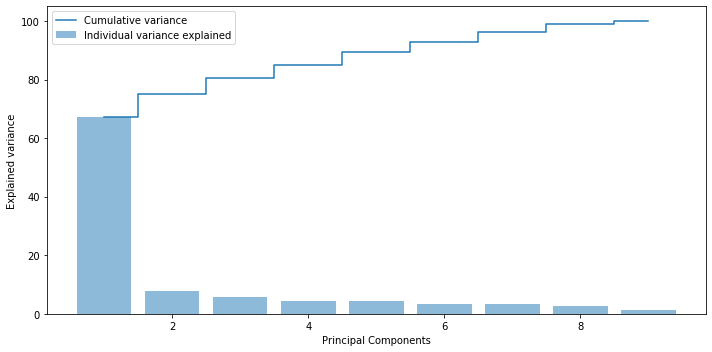

In [109]:
#Plotting to see variance explained
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(range(1,eigenvalues.size + 1),var_expl , alpha=0.5, align='center',label = "Individual variance explained")
plt.step(range(1,eigenvalues.size + 1),cum_var_sum,where='mid',label= "Cumulative variance")
plt.ylabel("Explained variance")
plt.xlabel("Principal Components")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [110]:
#First 7 principal component can able to explain 96% of the variance
#So using only 7 component

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [112]:
from sklearn.decomposition import PCA

#Instantiating the model 
pca = PCA(n_components=7)
data_reduced = pca.fit_transform(data_new)
data_reduced.transpose()

array([[-1.57264784,  2.39053855, -1.4433439 , ...,  3.89187089,
         2.8210938 ,  3.09280679],
       [-0.11942243, -0.97596664, -0.17407756, ...,  1.00950742,
        -1.35049199, -1.43324713],
       [-0.76306448,  0.30388886,  0.02378026, ...,  0.78124788,
         0.86193649,  0.92740071],
       ...,
       [-0.30141225,  0.32992925,  0.08401106, ..., -0.76564235,
         0.02922987,  0.03413916],
       [-0.55871178, -0.2409337 , -0.55967985, ..., -0.10102171,
         0.50748838,  0.1204895 ],
       [ 0.29358453, -0.36206813, -0.54686454, ...,  0.23108168,
         0.09572326,  0.02158776]])

In [113]:
pca.components_

array([[ 0.30115748,  0.37956804,  0.36923084,  0.33484923,  0.33398832,
         0.3470496 ,  0.32539556,  0.34385039,  0.24631255],
       [-0.00147183, -0.09235276, -0.1374793 , -0.12333348, -0.04136037,
        -0.05486816, -0.24706127,  0.02414581,  0.94393517],
       [-0.92152641,  0.00365809, -0.04831071,  0.20475401,  0.13072409,
         0.10192347,  0.20757956,  0.17179879,  0.08022649],
       [ 0.07510287, -0.08125544, -0.11090086, -0.24058601, -0.56680343,
         0.01283075,  0.75420084,  0.11889582,  0.11485033],
       [ 0.00916204, -0.00315817, -0.01341275,  0.63280549, -0.51340854,
         0.38603726, -0.13812691, -0.40572139,  0.05460226],
       [-0.04393679,  0.11512685,  0.13946651,  0.01760057, -0.48680744,
        -0.03301762, -0.41989802,  0.73261499, -0.11808455],
       [ 0.13182146, -0.10250605, -0.1884123 ,  0.59583244,  0.04499423,
        -0.73100507,  0.15688559,  0.13849702,  0.03758617]])

# Q10 Find correlation between components and features

In [117]:
df_comp = pd.DataFrame(pca.components_,columns=list(data_new))
df_comp

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.301157,0.379568,0.369231,0.334849,0.333988,0.347050,0.325396,0.343850,0.246313
1,-0.001472,-0.092353,-0.137479,-0.123333,-0.041360,-0.054868,-0.247061,0.024146,0.943935
2,-0.921526,0.003658,-0.048311,0.204754,0.130724,0.101923,0.207580,0.171799,0.080226
3,0.075103,-0.081255,-0.110901,-0.240586,-0.566803,0.012831,0.754201,0.118896,0.114850
4,0.009162,-0.003158,-0.013413,0.632805,-0.513409,0.386037,-0.138127,-0.405721,0.054602
5,-0.043937,0.115127,0.139467,0.017601,-0.486807,-0.033018,-0.419898,0.732615,-0.118085
6,0.131821,-0.102506,-0.188412,0.595832,0.044994,-0.731005,0.156886,0.138497,0.037586


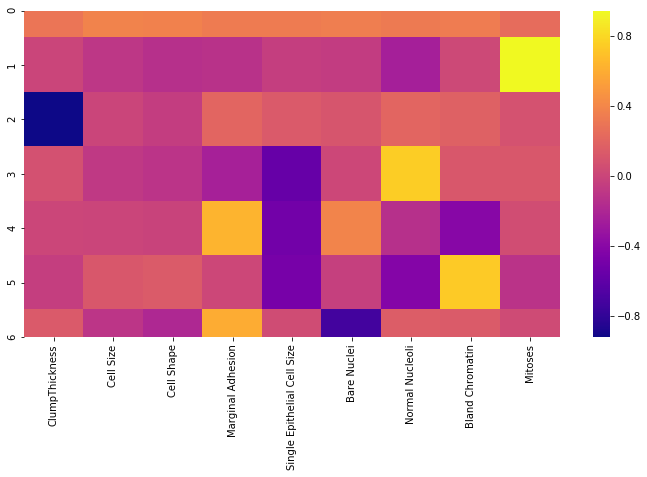

In [118]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [120]:
# This heatmap and the color bar basically represent the correlation between the various feature 
# and the principal component itself
# Component 5 looks more related to size and shape - We can label it as physical property
# PC1 could be labeeled with Mitoses
# Depending on relations ship, we could go ahead and label relationship with features